# ENV/ATM 415: Climate Laboratory

[Brian E. J. Rose](http://www.atmos.albany.edu/facstaff/brose/index.html), University at Albany

# Lecture 7: Radiative Equilibrium

____________
<a id='section1'></a>

## 1. The observed annual, global mean temperature profile
____________

We want to model the OLR in a column whose temperatures match observations. As we've done before, we'll calculate the global, annual mean air temperature from the NCEP Reanalysis data.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from xarray.ufuncs import cos, deg2rad, log
import climlab
from metpy.plots import SkewT

In [2]:
# This will try to read the data over the internet.
temperature_filename = 'air.mon.1981-2010.ltm.nc'
humidity_filename = 'shum.mon.1981-2010.ltm.nc'
#  to read over internet
ncep_url = "http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/"
path = ncep_url
#  Open handle to data
ncep_air = xr.open_dataset(path + temperature_filename, decode_times=False)
ncep_shum = xr.open_dataset(path + humidity_filename, decode_times=False)

In [3]:
ncep_air

<xarray.Dataset>
Dimensions:             (lat: 73, level: 17, lon: 144, nbnds: 2, time: 12)
Coordinates:
  * level               (level) float32 1000.0 925.0 850.0 700.0 600.0 500.0 ...
  * lon                 (lon) float32 0.0 2.5 5.0 7.5 10.0 12.5 15.0 17.5 ...
  * time                (time) float64 -6.571e+05 -6.57e+05 -6.57e+05 ...
  * lat                 (lat) float32 90.0 87.5 85.0 82.5 80.0 77.5 75.0 ...
Dimensions without coordinates: nbnds
Data variables:
    climatology_bounds  (time, nbnds) float64 ...
    air                 (time, level, lat, lon) float64 ...
    valid_yr_count      (time, level, lat, lon) float64 ...
Attributes:
    description:                     Data from NCEP initialized reanalysis (4...
    platform:                       Model
    Conventions:                    COARDS
    not_missing_threshold_percent:  minimum 3% values input to have non-missi...
    history:                        Created 2011/07/12 by doMonthLTM\nConvert...
    title:           

In [4]:
ncep_air.air

<xarray.DataArray 'air' (time: 12, level: 17, lat: 73, lon: 144)>
[2144448 values with dtype=float64]
Coordinates:
  * level    (level) float32 1000.0 925.0 850.0 700.0 600.0 500.0 400.0 ...
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 12.5 15.0 17.5 20.0 22.5 ...
  * time     (time) float64 -6.571e+05 -6.57e+05 -6.57e+05 -6.57e+05 ...
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 77.5 75.0 72.5 70.0 67.5 ...
Attributes:
    long_name:     Monthly Long Term Mean of Air temperature
    units:         degC
    precision:     2
    var_desc:      Air Temperature
    level_desc:    Multiple levels
    statistic:     Long Term Mean
    parent_stat:   Mean
    valid_range:   [-200.  300.]
    actual_range:  [-89.72233582  41.61600494]
    dataset:       NCEP Reanalysis Derived Products
    _ChunkSizes:   [  1   1  73 144]

In [5]:
ncep_air.level

<xarray.DataArray 'level' (level: 17)>
array([ 1000.,   925.,   850.,   700.,   600.,   500.,   400.,   300.,   250.,
         200.,   150.,   100.,    70.,    50.,    30.,    20.,    10.], dtype=float32)
Coordinates:
  * level    (level) float32 1000.0 925.0 850.0 700.0 600.0 500.0 400.0 ...
Attributes:
    units:         millibar
    long_name:     Level
    positive:      down
    GRIB_id:       100
    GRIB_name:     hPa
    actual_range:  [ 1000.    10.]
    axis:          Z

In [6]:
ncep_shum.level

<xarray.DataArray 'level' (level: 8)>
array([ 1000.,   925.,   850.,   700.,   600.,   500.,   400.,   300.], dtype=float32)
Coordinates:
  * level    (level) float32 1000.0 925.0 850.0 700.0 600.0 500.0 400.0 300.0
Attributes:
    units:         millibar
    long_name:     Level
    positive:      down
    GRIB_id:       100
    GRIB_name:     hPa
    actual_range:  [ 1000.   300.]
    axis:          Z

In [7]:
ncep_shum

<xarray.Dataset>
Dimensions:             (lat: 73, level: 8, lon: 144, nbnds: 2, time: 12)
Coordinates:
  * level               (level) float32 1000.0 925.0 850.0 700.0 600.0 500.0 ...
  * lon                 (lon) float32 0.0 2.5 5.0 7.5 10.0 12.5 15.0 17.5 ...
  * lat                 (lat) float32 90.0 87.5 85.0 82.5 80.0 77.5 75.0 ...
  * time                (time) float64 -6.571e+05 -6.57e+05 -6.57e+05 ...
Dimensions without coordinates: nbnds
Data variables:
    climatology_bounds  (time, nbnds) float64 ...
    shum                (time, level, lat, lon) float64 ...
    valid_yr_count      (time, level, lat, lon) float64 ...
Attributes:
    description:                    Data is from NMC initialized reanalysis\n...
    platform:                       Model
    Conventions:                    COARDS
    not_missing_threshold_percent:  minimum 3% values input to have non-missi...
    history:                        Created 2011/07/12 by doMonthLTM\nConvert...
    title:            

In [8]:
ncep_shum.shum

<xarray.DataArray 'shum' (time: 12, level: 8, lat: 73, lon: 144)>
[1009152 values with dtype=float64]
Coordinates:
  * level    (level) float32 1000.0 925.0 850.0 700.0 600.0 500.0 400.0 300.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 12.5 15.0 17.5 20.0 22.5 ...
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 77.5 75.0 72.5 70.0 67.5 ...
  * time     (time) float64 -6.571e+05 -6.57e+05 -6.57e+05 -6.57e+05 ...
Attributes:
    long_name:     Monthly Long Term Mean of Specific Humidity
    units:         grams/kg
    precision:     3
    var_desc:      Specific Humidity
    level_desc:    Multiple levels
    statistic:     Long Term Mean
    parent_stat:   Mean
    valid_range:   [ -9.99999866e-02   1.00430000e+02]
    actual_range:  [ -6.35976903e-07   3.58053970e+01]
    dataset:       NCEP Reanalysis Derived Products
    _ChunkSizes:   [  1   1  73 144]

In [9]:
#  Take global, annual average and convert to Kelvin
weight = cos(deg2rad(ncep_air.lat)) / cos(deg2rad(ncep_air.lat)).mean(dim='lat')
Tglobal = (ncep_air.air * weight).mean(dim=('lat','lon','time'))
print( Tglobal)

<xarray.DataArray (level: 17)>
array([ 15.179082,  11.207002,   7.838327,   0.219941,  -6.448343, -14.888844,
       -25.570467, -39.369685, -46.797908, -53.652235, -60.563551, -67.006048,
       -65.532927, -61.486637, -55.853581, -51.593945, -43.219982])
Coordinates:
  * level    (level) float32 1000.0 925.0 850.0 700.0 600.0 500.0 400.0 ...


In [10]:
climlab.constants.tempCtoK

273.15

In [11]:
#Tglobal += climlab.constants.tempCtoK
print( Tglobal)

<xarray.DataArray (level: 17)>
array([ 15.179082,  11.207002,   7.838327,   0.219941,  -6.448343, -14.888844,
       -25.570467, -39.369685, -46.797908, -53.652235, -60.563551, -67.006048,
       -65.532927, -61.486637, -55.853581, -51.593945, -43.219982])
Coordinates:
  * level    (level) float32 1000.0 925.0 850.0 700.0 600.0 500.0 400.0 ...


In [12]:
shum_global = (ncep_shum.shum * weight).mean(dim=('lat','lon','time'))
print(shum_global)

<xarray.DataArray (level: 8)>
array([ 10.404987,   7.889184,   5.755535,   3.171218,   1.993331,   1.168268,
         0.568467,   0.261722])
Coordinates:
  * level    (level) float32 1000.0 925.0 850.0 700.0 600.0 500.0 400.0 300.0


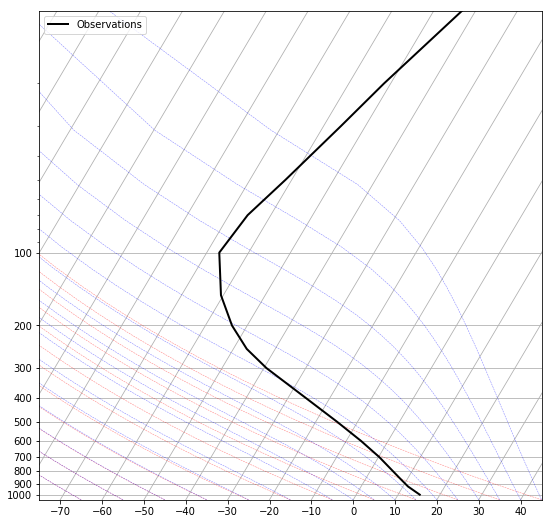

In [13]:
fig = plt.figure(figsize=(9, 9))
skew = SkewT(fig, rotation=30)
skew.plot(Tglobal.level, Tglobal, color='black', linestyle='-', linewidth=2, label='Observations')
skew.ax.set_ylim(1050, 10)
skew.ax.set_xlim(-75, 45)
# Add the relevant special lines
skew.plot_dry_adiabats(linewidth=0.5)
skew.plot_moist_adiabats(linewidth=0.5)
#skew.plot_mixing_lines()
skew.ax.legend()

In [14]:
state = climlab.column_state(lev=ncep_air.level, water_depth=2.5)

In [15]:
shum_global

<xarray.DataArray (level: 8)>
array([ 10.404987,   7.889184,   5.755535,   3.171218,   1.993331,   1.168268,
         0.568467,   0.261722])
Coordinates:
  * level    (level) float32 1000.0 925.0 850.0 700.0 600.0 500.0 400.0 300.0

In [16]:
qmin = 0.005  # minimum value -- some water in the stratosphere -- in g/kg
specific_humidity = np.zeros_like(state.Tatm)
specific_humidity[-8:] = np.flipud(shum_global)
specific_humidity[:-8] = qmin
specific_humidity

Field([  5.00000000e-03,   5.00000000e-03,   5.00000000e-03,
         5.00000000e-03,   5.00000000e-03,   5.00000000e-03,
         5.00000000e-03,   5.00000000e-03,   5.00000000e-03,
         2.61722439e-01,   5.68467386e-01,   1.16826843e+00,
         1.99333121e+00,   3.17121828e+00,   5.75553542e+00,
         7.88918384e+00,   1.04049866e+01])

In [17]:
state.Tatm.domain.lev.points

array([   10.,    20.,    30.,    50.,    70.,   100.,   150.,   200.,
         250.,   300.,   400.,   500.,   600.,   700.,   850.,   925.,
        1000.])

In [18]:
rad = climlab.radiation.RRTMG(name='Radiation',
                              state=state, 
                              specific_humidity=specific_humidity/1000,
                              timestep = climlab.constants.seconds_per_day,
                             )
print(rad)

Getting ozone data from /Users/br546577/anaconda3/lib/python3.6/site-packages/climlab/radiation/data/ozone/apeozone_cam3_5_54.nc
climlab Process of type <class 'climlab.radiation.rrtm.rrtmg.RRTMG'>. 
State variables and domain shapes: 
  Ts: (1,) 
  Tatm: (17,) 
The subprocess tree: 
Radiation: <class 'climlab.radiation.rrtm.rrtmg.RRTMG'>
   SW: <class 'climlab.radiation.rrtm.rrtmg_sw.RRTMG_SW'>
   LW: <class 'climlab.radiation.rrtm.rrtmg_lw.RRTMG_LW'>



In [19]:
rad.absorber_vmr

{'CCL4': 0.0,
 'CFC11': 0.0,
 'CFC12': 0.0,
 'CFC22': 0.0,
 'CH4': 1.65e-06,
 'CO2': 0.000348,
 'N2O': 3.06e-07,
 'O2': 0.21,
 'O3': array([  8.49933725e-06,   6.47842360e-06,   4.48576690e-06,
          2.25137178e-06,   1.13532298e-06,   5.32009049e-07,
          2.45552383e-07,   1.51755709e-07,   9.29020109e-08,
          6.59109748e-08,   5.02096369e-08,   4.29407799e-08,
          3.91554265e-08,   3.54532697e-08,   2.80298557e-08,
          2.49122466e-08,   2.19124599e-08])}

In [20]:
rad.specific_humidity

Field([  5.00000000e-06,   5.00000000e-06,   5.00000000e-06,
         5.00000000e-06,   5.00000000e-06,   5.00000000e-06,
         5.00000000e-06,   5.00000000e-06,   5.00000000e-06,
         2.61722439e-04,   5.68467386e-04,   1.16826843e-03,
         1.99333121e-03,   3.17121828e-03,   5.75553542e-03,
         7.88918384e-03,   1.04049866e-02])

The model is initialized with realistic ozone by default. Here we actually want to start by getting rid of the ozone.

In [21]:
rad_noO3 = climlab.process_like(rad)
rad_noO3.name = 'Radiation (no ozone)'
print(rad_noO3)

climlab Process of type <class 'climlab.radiation.rrtm.rrtmg.RRTMG'>. 
State variables and domain shapes: 
  Ts: (1,) 
  Tatm: (17,) 
The subprocess tree: 
Radiation (no ozone): <class 'climlab.radiation.rrtm.rrtmg.RRTMG'>
   SW: <class 'climlab.radiation.rrtm.rrtmg_sw.RRTMG_SW'>
   LW: <class 'climlab.radiation.rrtm.rrtmg_lw.RRTMG_LW'>



In [22]:
rad_noO3.absorber_vmr['O3'] *= 0.
rad_noO3.absorber_vmr

{'CCL4': 0.0,
 'CFC11': 0.0,
 'CFC12': 0.0,
 'CFC22': 0.0,
 'CH4': 1.65e-06,
 'CO2': 0.000348,
 'N2O': 3.06e-07,
 'O2': 0.21,
 'O3': array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.])}

In [23]:
rad_noO3_noH2O = climlab.process_like(rad_noO3)
rad_noO3_noH2O.specific_humidity *= 0.

In [24]:
rad_noO3_noH2O.integrate_years(5)

Integrating for 1826 steps, 1826.2110000000002 days, or 5 years.
Total elapsed time is 4.999422301147019 years.


In [25]:
def add_profile(skew, model, label):
    line = skew.plot(model.lev, model.Tatm - climlab.constants.tempCtoK,
             label=label, linewidth=2)[0]
    skew.plot(1000, model.Ts - climlab.constants.tempCtoK, 'o', 
              markersize=8, color=line.get_color())
    skew.ax.legend()
    return fig

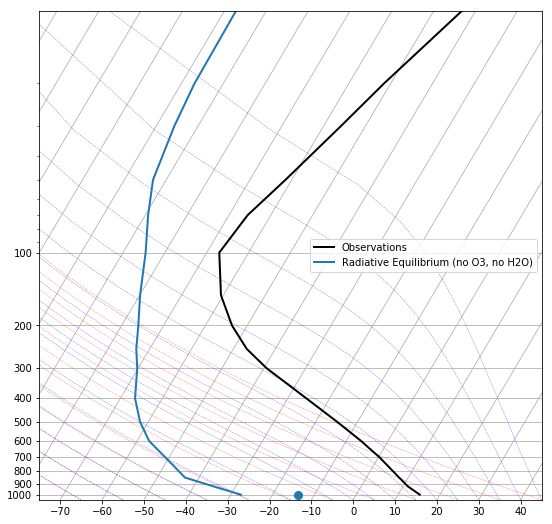

In [26]:
add_profile(skew, rad_noO3_noH2O, label='Radiative Equilibrium (no O3, no H2O)')

In [27]:
rad_noO3.integrate_years(5)

Integrating for 1826 steps, 1826.2110000000002 days, or 5 years.
Total elapsed time is 4.999422301147019 years.


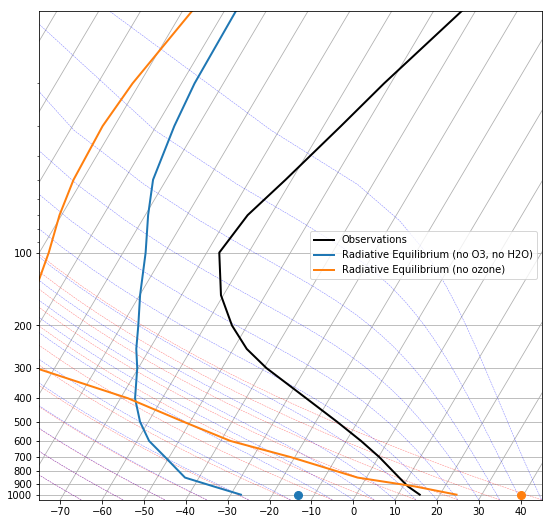

In [28]:
add_profile(skew, rad_noO3, label='Radiative Equilibrium (no ozone)')

In [29]:
rad.compute_diagnostics()

In [30]:
rad.ASR

Field([ 244.82032867])

In [31]:
rad.OLR

Field([ 248.76832684])

In [32]:
rad.step_forward()

In [33]:
rad.ASR - rad.OLR

Field([-3.94799817])

In [34]:
rad.integrate_years(5)

Integrating for 1826 steps, 1826.2110000000002 days, or 5 years.
Total elapsed time is 5.00216021040285 years.


In [35]:
rad.Ts

Field([ 311.14344242])

In [36]:
rad.ASR - rad.OLR

Field([ -9.09494702e-12])

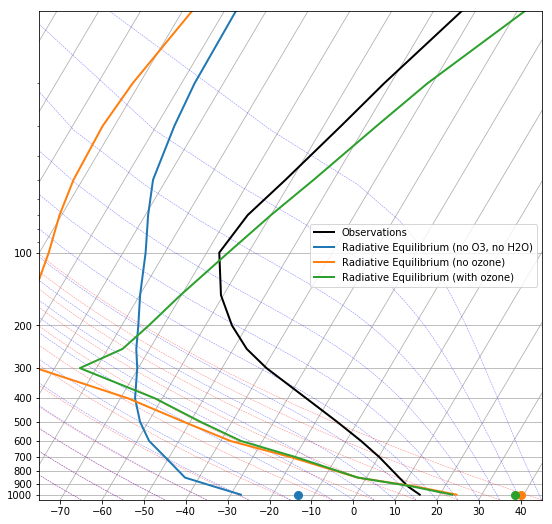

In [37]:
add_profile(skew, rad, label='Radiative Equilibrium (with ozone)')

In [38]:
conv = climlab.convection.ConvectiveAdjustment(name='Convective Adjustment',
                                               state=state,
                                               adj_lapse_rate=6.5,
                                               timestep=rad.timestep,)
rcm = rad + conv
rcm.name = 'Radiative-Convective Model'
print(rcm)

climlab Process of type <class 'climlab.process.time_dependent_process.TimeDependentProcess'>. 
State variables and domain shapes: 
  Ts: (1,) 
  Tatm: (17,) 
The subprocess tree: 
Radiative-Convective Model: <class 'climlab.process.time_dependent_process.TimeDependentProcess'>
   Radiation: <class 'climlab.radiation.rrtm.rrtmg.RRTMG'>
      SW: <class 'climlab.radiation.rrtm.rrtmg_sw.RRTMG_SW'>
      LW: <class 'climlab.radiation.rrtm.rrtmg_lw.RRTMG_LW'>
   Convective Adjustment: <class 'climlab.convection.convadj.ConvectiveAdjustment'>



In [39]:
rcm.integrate_years(5)

Integrating for 1826 steps, 1826.2110000000002 days, or 5 years.
Total elapsed time is 4.99942230115 years.


In [40]:
rcm.Ts

Field([ 285.00197379])

In [41]:
rad.Ts - climlab.constants.tempCtoK

Field([ 11.85197379])

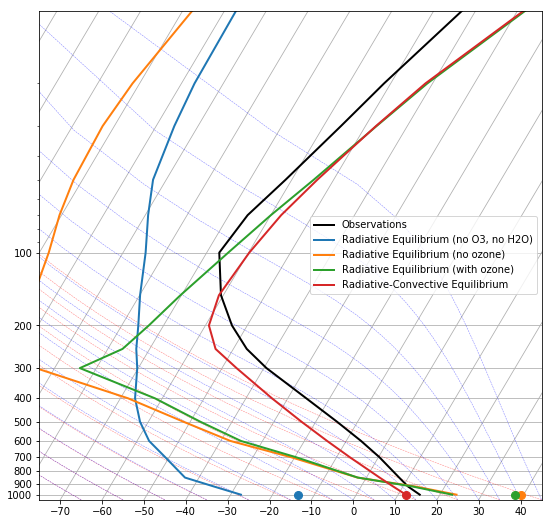

In [42]:
add_profile(skew, rcm, label='Radiative-Convective Equilibrium')

In [43]:
# Temperatures in a single column
state = climlab.column_state(num_lev=30, water_depth=2.5)
#  Initialize a nearly dry column (small background stratospheric humidity)
state['q'] = np.ones_like(state.Tatm) * 5.E-6
#  ASYNCHRONOUS COUPLING -- the radiation uses a much longer timestep
short_timestep = climlab.constants.seconds_per_hour
#  Radiation coupled to water vapor
rad = climlab.radiation.RRTMG(name='Radiation',
                    state=state,
                    specific_humidity=state.q,
                    albedo=0.2,
                    timestep=24*short_timestep)
#  Convection scheme -- water vapor is a state variable
conv = climlab.convection.EmanuelConvection(name='Convection',
                              state=state,
                              timestep=short_timestep,
                              ALPHA=0.1,)
#  Surface heat flux processes
shf = climlab.surface.SensibleHeatFlux(name='SHF',
                              state=state, Cd=0.5E-3, U=10.,
                              timestep=short_timestep)
lhf = climlab.surface.LatentHeatFlux(name='LHF',
                              state=state, Cd=0.5E-3, U=10.,
                              timestep=short_timestep)
#  Couple all the submodels together
turb = climlab.couple([shf,lhf], name='Turbulent')
model = climlab.couple([rad, conv, turb], name='RadiativeConvectiveModel')
print(model)


Getting ozone data from /Users/br546577/anaconda3/lib/python3.6/site-packages/climlab/radiation/data/ozone/apeozone_cam3_5_54.nc
climlab Process of type <class 'climlab.process.time_dependent_process.TimeDependentProcess'>. 
State variables and domain shapes: 
  Ts: (1,) 
  Tatm: (30,) 
  q: (30,) 
The subprocess tree: 
RadiativeConvectiveModel: <class 'climlab.process.time_dependent_process.TimeDependentProcess'>
   Radiation: <class 'climlab.radiation.rrtm.rrtmg.RRTMG'>
      SW: <class 'climlab.radiation.rrtm.rrtmg_sw.RRTMG_SW'>
      LW: <class 'climlab.radiation.rrtm.rrtmg_lw.RRTMG_LW'>
   Convection: <class 'climlab.convection.emanuel_convection.EmanuelConvection'>
   Turbulent: <class 'climlab.process.time_dependent_process.TimeDependentProcess'>
      SHF: <class 'climlab.surface.turbulent.SensibleHeatFlux'>
      LHF: <class 'climlab.surface.turbulent.LatentHeatFlux'>



In [44]:
model.integrate_years(5)

Integrating for 43829 steps, 1826.2110000000002 days, or 5 years.
Total elapsed time is 4.99999269891 years.


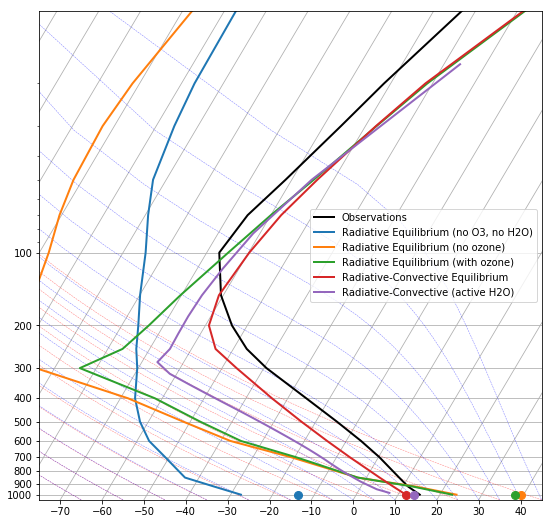

In [45]:
add_profile(skew,model,label='Radiative-Convective (active H2O)')